In [2]:
import numpy as np 
import pandas as pd 
import bz2
import gc
import chardet
import re
import os

In [ ]:
train_file = bz2.BZ2File('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/train.ft.txt.bz2')
test_file = bz2.BZ2File('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/test.ft.txt.bz2')

In [ ]:
train_file

In [ ]:
train_file_lines = train_file.readlines()
test_file_lines = test_file.readlines()

In [ ]:
train_file_lines = [x.decode('utf-8') for x in train_file_lines]
test_file_lines = [x.decode('utf-8') for x in test_file_lines]

In [ ]:
train_file_lines[:5]

['__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n',
 "__label__2 The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\n",
 '__label__2 Amazing!: This s

In [ ]:
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file_lines]
train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in train_file_lines]

In [ ]:
train_labels[:5]

[1, 1, 1, 1, 1]

In [ ]:
train_sentences[:5]

In [ ]:
for i in range(len(train_sentences)):
    train_sentences[i] = re.sub('\d','0',train_sentences[i])

In [ ]:
train_sentences[:5]

In [ ]:
print(len(train_sentences))

3600000


In [ ]:
test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file_lines]
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in test_file_lines]

for i in range(len(test_sentences)):
    test_sentences[i] = re.sub('\d','0',test_sentences[i])

In [ ]:
print(len(test_sentences))

400000


In [ ]:
for i in range(len(train_sentences)):
    if 'www.' in train_sentences[i] or 'http:' in train_sentences[i] or 'https:' in train_sentences[i] or '.com' in train_sentences[i]:
        train_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", train_sentences[i])
        
for i in range(len(test_sentences)):
    if 'www.' in test_sentences[i] or 'http:' in test_sentences[i] or 'https:' in test_sentences[i] or '.com' in test_sentences[i]:
        test_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", test_sentences[i])

In [ ]:
del train_file_lines, test_file_lines

In [ ]:
gc.collect()

397

In [ ]:
train_sentences
train_labels
test_sentences
test_labels

In [ ]:
train_set=pd.concat([pd.DataFrame(train_sentences),pd.DataFrame(train_labels)],axis=1)
train_set.columns=['review','label']
train_set.head()

,review,label
0,stuning even for the non-gamer: this sound tra...,1
1,the best soundtrack ever to anything.: i'm rea...,1
2,amazing!: this soundtrack is my favorite music...,1
3,excellent soundtrack: i truly like this soundt...,1
4,"remember, pull your jaw off the floor after he...",1


In [ ]:
test_set=pd.concat([pd.DataFrame(test_sentences),pd.DataFrame(test_labels)],axis=1)
test_set.columns=['review','label']
test_set.head()

,review,label
0,great cd: my lovely pat has one of the great v...,1
1,one of the best game music soundtracks - for a...,1
2,batteries died within a year ...: i bought thi...,0
3,"works fine, but maha energy is better: check o...",1
4,great for the non-audiophile: reviewed quite a...,1


In [ ]:
train_set.to_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/train_set.csv')
test_set.to_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/test_set.csv')

# Code for re-process text data from Text_analytic Apress

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 01 01:11:02 2016
@author: DIP
"""

CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [4]:
import nltk
import spacy
import unicodedata
#from contractions import CONTRACTION_MAP
import re
from nltk.corpus import wordnet
nltk.download('stopwords')
import collections
#from textblob import Word
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
nlp = spacy.load('en', parse=True, tag=True, entity=True)
# nlp_vec = spacy.load('en_vectors_web_lg', parse=True, tag=True, entity=True)



def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    if bool(soup.find()):
        [s.extract() for s in soup(['iframe', 'script'])]
        stripped_text = soup.get_text()
        stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    else:
        stripped_text = text
    return stripped_text


#def correct_spellings_textblob(tokens):
#	return [Word(token).correct() for token in tokens]  


def simple_porter_stemming(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text


def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text


def remove_repeated_characters(tokens):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'
    def replace(old_word):
        if wordnet.synsets(old_word):
            return old_word
        new_word = repeat_pattern.sub(match_substitution, old_word)
        return replace(new_word) if new_word != old_word else new_word
            
    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens


def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]|\[|\]' if not remove_digits else r'[^a-zA-Z\s]|\[|\]'
    text = re.sub(pattern, '', text)
    return text


def remove_stopwords(text, is_lower_case=False, stopwords=stopword_list):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_stemming=False, text_lemmatization=True, 
                     special_char_removal=True, remove_digits=True,
                     stopword_removal=True, stopwords=stopword_list):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:

        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)

        # remove extra newlines
        doc = doc.translate(doc.maketrans("\n\t\r", "   "))

        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)

        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)

        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)

        # stem text
        if text_stemming and not text_lemmatization:
        	doc = simple_porter_stemming(doc)

        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  

        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)

         # lowercase the text    
        if text_lower_case:
            doc = doc.lower()

        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case, stopwords=stopwords)

        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        doc = doc.strip()
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Ch09a - Sentiment Analysis - Unsupervised Lexical.ipynb

No need to re-process data before training

## Sentiment Analysis with textblob

In [ ]:
import pandas as pd
import numpy as np
#import text_normalizer as tn # specific ebook library
#import model_evaluation_utils as meu # specific ebook library
import nltk
import textblob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
train_set=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/train_set.csv')
test_set=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/test_set.csv')

In [ ]:
print(train_set.shape)
print(test_set.shape)

(3600000, 3)
(400000, 3)


In [ ]:
test_set.head()

,Unnamed: 0,review,label
0,0,great cd: my lovely pat has one of the great v...,1
1,1,one of the best game music soundtracks - for a...,1
2,2,batteries died within a year ...: i bought thi...,0
3,3,"works fine, but maha energy is better: check o...",1
4,4,great for the non-audiophile: reviewed quite a...,1


In [ ]:
reviews = np.array(test_set['review'])
sentiments = np.array(test_set['label'])
split_ratio=0.7
split=int(test_set.shape[0]*0.7)
test_reviews = reviews[split:]
test_sentiments = sentiments[split:]
sample_review_ids = [0, 200, 500]

In [ ]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', textblob.TextBlob(review).sentiment.polarity)
    print('-'*60)

REVIEW: amazing compositions, performances and recording quality!: having purchased and enjoyed the other 0 star disc of this group i had to see what "closer" was like.this disc is even better in many respects.the compositions are so clever, the arrangements perfect and the recording/mixing are stunning.would love to see a live concert here in new zealand!
Actual Sentiment: 1
Predicted Sentiment polarity: 0.40984848484848485
------------------------------------------------------------
REVIEW: i liked it: great story, no violence, nudity, profanity, a movie everyone can watch and enjoy. i would recommend this movie to anyone
Actual Sentiment: 1
Predicted Sentiment polarity: 0.6
------------------------------------------------------------
REVIEW: poor bob, victim of himself!: awful. i mean, really awful...and i liked "self portrait" because you knew dylan was just trying to have some fun with his image. this album is just a disaster. the lyrics are ok on most songs (i've seen worse by dy

In [ ]:
sentiment_polarity = [textblob.TextBlob(review).sentiment.polarity for review in test_reviews]
predicted_sentiments = [1 if score >= 0.1 else 0 for score in sentiment_polarity]
print(classification_report(test_sentiments,predicted_sentiments))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73     60301
           1       0.71      0.87      0.78     59699

    accuracy                           0.76    120000
   macro avg       0.77      0.76      0.76    120000
weighted avg       0.77      0.76      0.76    120000



## Sentiment Analysis with AFINN

In [ ]:
!pip install afinn
from afinn import Afinn
afn = Afinn(emoticons=True)

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp36-none-any.whl size=53452 sha256=001d03417353dd2aadb3386448da728e155d6b6bf9a505f507cd1799791be206
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [ ]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', afn.score(review))
    print('-'*60)

REVIEW: amazing compositions, performances and recording quality!: having purchased and enjoyed the other 0 star disc of this group i had to see what "closer" was like.this disc is even better in many respects.the compositions are so clever, the arrangements perfect and the recording/mixing are stunning.would love to see a live concert here in new zealand!
Actual Sentiment: 1
Predicted Sentiment polarity: 26.0
------------------------------------------------------------
REVIEW: i liked it: great story, no violence, nudity, profanity, a movie everyone can watch and enjoy. i would recommend this movie to anyone
Actual Sentiment: 1
Predicted Sentiment polarity: 5.0
------------------------------------------------------------
REVIEW: poor bob, victim of himself!: awful. i mean, really awful...and i liked "self portrait" because you knew dylan was just trying to have some fun with his image. this album is just a disaster. the lyrics are ok on most songs (i've seen worse by dylan), but the m

In [ ]:
sentiment_polarity = [afn.score(review) for review in test_reviews]
predicted_sentiments = [1 if score >= 1.0 else 0 for score in sentiment_polarity]
print(classification_report(test_sentiments,predicted_sentiments))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63     60301
           1       0.64      0.92      0.76     59699

    accuracy                           0.71    120000
   macro avg       0.75      0.71      0.69    120000
weighted avg       0.75      0.71      0.69    120000



## Sentiment Analysis with SentiWordNet (VERY LONG, not stable)

In [ ]:
from nltk.corpus import sentiwordnet as swn
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')

awesome = list(swn.senti_synsets('awesome', 'a'))[0]
print('Positive Polarity Score:', awesome.pos_score())
print('Negative Polarity Score:', awesome.neg_score())
print('Objective Score:', awesome.obj_score())

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Positive Polarity Score: 0.875
Negative Polarity Score: 0.125
Objective Score: 0.0


In [ ]:
def analyze_sentiment_sentiwordnet_lexicon(review,
                                           verbose=False):

    # tokenize and POS tag text tokens
    tagged_text = [(token.text, token.tag_) for token in nlp(review)] # from text_normalizer.py
    pos_score = neg_score = token_count = obj_score = 0
    # get wordnet synsets based on POS tags
    # get sentiment scores if synsets are found
    for word, tag in tagged_text:
        ss_set = None
        if 'NN' in tag and list(swn.senti_synsets(word, 'n')):
            ss_set = list(swn.senti_synsets(word, 'n'))[0]
        elif 'VB' in tag and list(swn.senti_synsets(word, 'v')):
            ss_set = list(swn.senti_synsets(word, 'v'))[0]
        elif 'JJ' in tag and list(swn.senti_synsets(word, 'a')):
            ss_set = list(swn.senti_synsets(word, 'a'))[0]
        elif 'RB' in tag and list(swn.senti_synsets(word, 'r')):
            ss_set = list(swn.senti_synsets(word, 'r'))[0]
        # if senti-synset is found        
        if ss_set:
            # add scores for all found synsets
            pos_score += ss_set.pos_score()
            neg_score += ss_set.neg_score()
            obj_score += ss_set.obj_score()
            token_count += 1
    
    # aggregate final scores
    final_score = pos_score - neg_score
    norm_final_score = round(float(final_score) / token_count, 2)
    final_sentiment = 1 if norm_final_score >= 0 else 0
    if verbose:
        norm_obj_score = round(float(obj_score) / token_count, 2)
        norm_pos_score = round(float(pos_score) / token_count, 2)
        norm_neg_score = round(float(neg_score) / token_count, 2)
        # to display results in a nice table
        sentiment_frame = pd.DataFrame([[final_sentiment, norm_obj_score, norm_pos_score, 
                                         norm_neg_score, norm_final_score]],
                                       columns = ['Predicted Sentiment', 'Objectivity',
                                                     'Positive', 'Negative', 'Overall']
                                       #columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                       #                      ['Predicted Sentiment', 'Objectivity',
                                        #                      'Positive', 'Negative', 'Overall']], 
                                       #                      labels=[[0,0,0,0,0],[0,1,2,3,4]])
                                       )
        print(sentiment_frame)
        
    return final_sentiment

In [ ]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    pred = analyze_sentiment_sentiwordnet_lexicon(review, verbose=True)    
    print('-'*60)

REVIEW: amazing compositions, performances and recording quality!: having purchased and enjoyed the other 0 star disc of this group i had to see what "closer" was like.this disc is even better in many respects.the compositions are so clever, the arrangements perfect and the recording/mixing are stunning.would love to see a live concert here in new zealand!
Actual Sentiment: 1
   Predicted Sentiment  Objectivity  Positive  Negative  Overall
0                    1         0.81      0.15      0.04     0.11
------------------------------------------------------------
REVIEW: i liked it: great story, no violence, nudity, profanity, a movie everyone can watch and enjoy. i would recommend this movie to anyone
Actual Sentiment: 1
   Predicted Sentiment  Objectivity  Positive  Negative  Overall
0                    1         0.88      0.07      0.06     0.01
------------------------------------------------------------
REVIEW: poor bob, victim of himself!: awful. i mean, really awful...and i lik

In [ ]:
#norm_test_reviews = normalize_corpus(test_reviews)
#predicted_sentiments = [analyze_sentiment_sentiwordnet_lexicon(review, verbose=False) for review in norm_test_reviews]

ZeroDivisionError: ignored

In [ ]:
print(classification_report(test_sentiments,predicted_sentiments))

## Sentiment Analysis with VADER

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [ ]:
def analyze_sentiment_vader_lexicon(review, 
                                    threshold=0.1,
                                    verbose=False):
    # pre-process text
    review = strip_html_tags(review)
    review = remove_accented_chars(review)
    review = expand_contractions(review)
    
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    #1: positive, o: negative
    if verbose:
        # display detailed sentiment statistics
        positive = str(round(scores['pos'], 2)*100)+'%'
        final = round(agg_score, 2)
        negative = str(round(scores['neg'], 2)*100)+'%'
        neutral = str(round(scores['neu'], 2)*100)+'%'
        sentiment_frame = pd.DataFrame([[final_sentiment, final, positive,
                                        negative, neutral]],
                                       columns = ['Predicted Sentiment', 'Polarity Score',
                                                     'Positive', 'Negative', 'Overall']
                                        #columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                        #                              ['Predicted Sentiment', 'Polarity Score',
                                         #                              'Positive', 'Negative', 'Neutral']], 
                                          #                    labels=[[0,0,0,0,0],[0,1,2,3,4]])
                                        )
        print(sentiment_frame)
    
    return final_sentiment

In [ ]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    pred = analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=True)    
    print('-'*60)

REVIEW: amazing compositions, performances and recording quality!: having purchased and enjoyed the other 0 star disc of this group i had to see what "closer" was like.this disc is even better in many respects.the compositions are so clever, the arrangements perfect and the recording/mixing are stunning.would love to see a live concert here in new zealand!
Actual Sentiment: 1
   Predicted Sentiment  Polarity Score Positive Negative Overall
0                    1            0.97    33.0%     0.0%   67.0%
------------------------------------------------------------
REVIEW: i liked it: great story, no violence, nudity, profanity, a movie everyone can watch and enjoy. i would recommend this movie to anyone
Actual Sentiment: 1
   Predicted Sentiment  Polarity Score Positive Negative Overall
0                    1            0.74    38.0%    19.0%   43.0%
------------------------------------------------------------
REVIEW: poor bob, victim of himself!: awful. i mean, really awful...and i lik

In [ ]:
predicted_sentiments = [analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=False) for review in test_reviews]
print(classification_report(test_sentiments,predicted_sentiments))

              precision    recall  f1-score   support

           0       0.84      0.63      0.72     60301
           1       0.70      0.88      0.78     59699

    accuracy                           0.76    120000
   macro avg       0.77      0.76      0.75    120000
weighted avg       0.77      0.76      0.75    120000



# Ch09b - Sentiment Analysis - Supervised.ipynb

In [ ]:
import pandas as pd
import numpy as np
#import text_normalizer as tn
#import model_evaluation_utils as meu
import nltk

np.set_printoptions(precision=2, linewidth=80)

In [ ]:
train_set=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/train_set.csv')
test_set=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/test_set.csv')
print(train_set.shape)
print(test_set.shape)
test_set.head()

(3600000, 3)
(400000, 3)


,Unnamed: 0,review,label
0,0,great cd: my lovely pat has one of the great v...,1
1,1,one of the best game music soundtracks - for a...,1
2,2,batteries died within a year ...: i bought thi...,0
3,3,"works fine, but maha energy is better: check o...",1
4,4,great for the non-audiophile: reviewed quite a...,1


In [ ]:
reviews = np.array(train_set['review'])
sentiments = np.array(train_set['label'])
# build train and test datasets
train_reviews = reviews[:35000]
train_sentiments = sentiments[:35000]
test_reviews = reviews[35000:50000]
test_sentiments = sentiments[35000:50000]

In [ ]:
# normalize datasets
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('but')
stop_words.remove('not')

norm_train_reviews = normalize_corpus(train_reviews, stopwords=stop_words)
norm_test_reviews = normalize_corpus(test_reviews, stopwords=stop_words)

In [ ]:
pd.DataFrame(norm_train_reviews).to_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/norm_train_reviews.csv')
pd.DataFrame(norm_test_reviews).to_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/norm_test_reviews.csv')

## Traditional Supervised Machine Learning Models

### Feature Engineering (LOAD FILE AFTER PRE PROCESS BENGIN HERE)

In [ ]:
norm_train_reviews=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/norm_train_reviews.csv')
norm_test_reviews=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/norm_test_reviews.csv')
norm_train_reviews=norm_train_reviews['0']
norm_test_reviews=norm_test_reviews['0']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)
# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

In [ ]:
# transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)

In [ ]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (35000, 816540)  Test features shape: (15000, 816540)
TFIDF model:> Train features shape: (35000, 816540)  Test features shape: (15000, 816540)


### Model Training, Prediction and Performance Evaluation

In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', max_iter=100)

model on BOW features

In [ ]:
lr.fit(cv_train_features, train_sentiments)
y_pred = lr.predict(cv_test_features)
print(classification_report(test_sentiments,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7143
           1       0.89      0.90      0.90      7857

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
svm.fit(cv_train_features, train_sentiments)
y_pred = svm.predict(cv_test_features)
print(classification_report(test_sentiments,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7143
           1       0.90      0.89      0.90      7857

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



model on TF-IDF features

In [ ]:
lr.fit(tv_train_features, train_sentiments)
y_pred = lr.predict(tv_test_features)
print(classification_report(test_sentiments,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7143
           1       0.89      0.89      0.89      7857

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [ ]:
svm.fit(tv_train_features, train_sentiments)
y_pred = svm.predict(tv_test_features)
print(classification_report(test_sentiments,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7143
           1       0.90      0.89      0.89      7857

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



## Newer Supervised Deep Learning Models

In [ ]:
import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder
from keras.layers.normalization import BatchNormalization

### Prediction class label encoding

In [ ]:
#norm_train_reviews
#norm_test_reviews
#train_sentiments
#test_sentiments

In [ ]:
# tokenize train reviews & encode train labels
tokenized_train = [tokenizer.tokenize(text)
                   for text in norm_train_reviews]
# tokenize test reviews & encode test labels
tokenized_test = [tokenizer.tokenize(text)
                   for text in norm_test_reviews]

In [ ]:
print(tokenized_train[0])

['stun', 'even', 'non', 'gamer', 'sound', 'track', 'beautiful', 'paint', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid', 'game', 'music', 'play', 'game', 'chrono', 'cross', 'but', 'game', 'ever', 'play', 'good', 'music', 'back', 'away', 'crude', 'keyboarding', 'take', 'fresher', 'step', 'grate', 'guitar', 'soulful', 'orchestra', 'would', 'impress', 'anyone', 'care', 'listen']


### Feature Engineering with word embeddings

feature engineering with word2vec

In [ ]:
%%time
# build word2vec model
w2v_num_features = 512
w2v_model = gensim.models.Word2Vec(tokenized_train, size=w2v_num_features, window=150,
                                   min_count=10, sample=1e-3, workers=16)

CPU times: user 1min 27s, sys: 231 ms, total: 1min 27s
Wall time: 45.9 s


In [ ]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [ ]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model,
                                                     num_features=w2v_num_features)
avg_wv_test_features = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model,
                                                    num_features=w2v_num_features)

In [ ]:
print(avg_wv_train_features.shape)
print(avg_wv_test_features.shape)

(35000, 512)
(15000, 512)


In [ ]:
avg_wv_test_features

array([[-0.09,  0.1 , -0.25, ..., -0.28,  0.37, -0.39],
       [-0.16,  0.02, -0.11, ..., -0.39,  0.35, -0.46],
       [-0.06, -0.05,  0.22, ...,  0.06,  0.08,  0.16],
       ...,
       [ 0.41,  0.37, -0.44, ..., -0.  ,  0.16, -0.19],
       [ 0.46,  0.69, -0.52, ..., -0.03,  0.08, -0.22],
       [-0.04,  0.05,  0.2 , ...,  0.02,  0.03, -0.12]])

In [ ]:
#!python -m spacy download en_vectors_web_lg

In [ ]:
!python -m spacy link en_vectors_web_lg en_vectors_web_lg_link

✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_vectors_web_lg -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en_vectors_web_lg_link
You can now load the model via spacy.load('en_vectors_web_lg_link')


In [ ]:
nlp_vec = spacy.load('en_vectors_web_lg_link', parse=True, tag=True, entity=True)

feature engineering with GloVe model

In [ ]:
# feature engineering with GloVe model
train_nlp = [nlp_vec(item) for item in norm_train_reviews]
train_glove_features = np.array([item.vector for item in train_nlp])

test_nlp = [nlp_vec(item) for item in norm_test_reviews]
test_glove_features = np.array([item.vector for item in test_nlp])

In [ ]:
# feature engineering with GloVe model
#Replace nlp_vec = nlp (space.load('en') instead of 'en_vectors_web_lg')
#train_nlp = [nlp(item) for item in norm_train_reviews]
#train_glove_features = np.array([item.vector for item in train_nlp])

#test_nlp = [nlp(item) for item in norm_test_reviews]
#test_glove_features = np.array([item.vector for item in test_nlp])

In [ ]:
train_glove_features

array([[-0.02,  0.16, -0.15, ..., -0.02,  0.01,  0.18],
       [-0.16,  0.2 , -0.08, ..., -0.11,  0.12,  0.05],
       [-0.04,  0.2 , -0.11, ..., -0.07,  0.04,  0.13],
       ...,
       [-0.07,  0.02, -0.12, ..., -0.15,  0.1 ,  0.03],
       [-0.17,  0.06, -0.15, ..., -0.12,  0.07, -0.03],
       [-0.21,  0.05, -0.16, ..., -0.2 ,  0.17,  0.03]], dtype=float32)

In [ ]:
print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape, ' Test features shape:', avg_wv_test_features.shape)
print('GloVe model:> Train features shape:', train_glove_features.shape, ' Test features shape:', test_glove_features.shape)

Word2Vec model:> Train features shape: (35000, 512)  Test features shape: (15000, 512)
GloVe model:> Train features shape: (35000, 300)  Test features shape: (15000, 300)


### Modeling with deep neural networks

In [ ]:
def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, input_shape=(num_input_features,), kernel_initializer='glorot_uniform'))
    dnn_model.add(BatchNormalization())
    dnn_model.add(Activation('relu'))
    dnn_model.add(Dropout(0.2))
    
    dnn_model.add(Dense(512, kernel_initializer='glorot_uniform'))
    dnn_model.add(BatchNormalization())
    dnn_model.add(Activation('relu'))
    dnn_model.add(Dropout(0.2))
    
    dnn_model.add(Dense(512, kernel_initializer='glorot_uniform'))
    dnn_model.add(BatchNormalization())
    dnn_model.add(Activation('relu'))
    dnn_model.add(Dropout(0.2))
    
    dnn_model.add(Dense(1))
    dnn_model.add(Activation('softmax'))

    dnn_model.compile(loss='binary_crossentropy', optimizer='adam',                 
                      metrics=['accuracy'])
    return dnn_model

Deep learning for w2v

In [ ]:
w2v_num_features

512

In [ ]:
w2v_dnn = construct_deepnn_architecture(num_input_features=w2v_num_features)

In [ ]:
batch_size = 100
w2v_dnn.fit(avg_wv_train_features, train_sentiments, epochs=10, batch_size=batch_size, 
            shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/10
315/315 [==============================] - 7s 23ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 2/10
315/315 [==============================] - 7s 22ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 3/10
315/315 [==============================] - 7s 22ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 4/10
315/315 [==============================] - 7s 21ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 5/10
315/315 [==============================] - 7s 22ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 6/10
315/315 [==============================] - 7s 22ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 7/10
315/315 [==============================] - 7s 22ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460

In [ ]:
y_pred = w2v_dnn.predict_classes(avg_wv_test_features)
print(classification_report(test_sentiments,y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7143
           1       0.52      1.00      0.69      7857

    accuracy                           0.52     15000
   macro avg       0.26      0.50      0.34     15000
weighted avg       0.27      0.52      0.36     15000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Deep learning for glove_features

In [ ]:
glove_dnn = construct_deepnn_architecture(num_input_features=300)
batch_size = 100
glove_dnn.fit(train_glove_features, train_sentiments, epochs=10, batch_size=batch_size, 
              shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/10
315/315 [==============================] - 7s 21ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 2/10
315/315 [==============================] - 6s 21ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 3/10
315/315 [==============================] - 6s 20ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 4/10
315/315 [==============================] - 6s 20ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 5/10
315/315 [==============================] - 6s 20ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 6/10
315/315 [==============================] - 6s 20ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 7/10
315/315 [==============================] - 6s 20ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460

In [ ]:
y_pred = glove_dnn.predict_classes(test_glove_features)
print(classification_report(test_sentiments,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7143
           1       0.52      1.00      0.69      7857

    accuracy                           0.52     15000
   macro avg       0.26      0.50      0.34     15000
weighted avg       0.27      0.52      0.36     15000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ch09c - Sentiment Analysis - Advanced Deep Learning.ipynb

In [7]:
norm_train_reviews=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/norm_train_reviews.csv')
norm_test_reviews=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/norm_test_reviews.csv')
norm_train_reviews=norm_train_reviews['0']
norm_test_reviews=norm_test_reviews['0']

In [9]:
print(len(norm_train_reviews))
print(len(norm_test_reviews))

35000
15000


In [40]:
train_set=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/train_set.csv')
print(train_set.shape)
reviews = np.array(train_set['review'])
sentiments = np.array(train_set['label'])
train_sentiments = sentiments[:35000]
test_sentiments = sentiments[35000:50000]

(3600000, 3)


## Tokenize train & test datasets

In [10]:
# from text_normalizer.py
tokenized_train = [tokenizer.tokenize(text) for text in norm_train_reviews]
tokenized_test = [tokenizer.tokenize(text) for text in norm_test_reviews]

In [15]:
print(len(tokenized_train))
print(tokenized_train[0])

35000
['stun', 'even', 'non', 'gamer', 'sound', 'track', 'beautiful', 'paint', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid', 'game', 'music', 'play', 'game', 'chrono', 'cross', 'but', 'game', 'ever', 'play', 'good', 'music', 'back', 'away', 'crude', 'keyboarding', 'take', 'fresher', 'step', 'grate', 'guitar', 'soulful', 'orchestra', 'would', 'impress', 'anyone', 'care', 'listen']


## Build Vocabulary Mapping (word to index)

In [27]:
from collections import Counter
from itertools import islice

# build word to index vocabulary
token_counter = Counter([token for review in tokenized_train for token in review])
print(len(token_counter))
# see inside token_counter
lengths = Counter()
lengths.update(dict(islice(token_counter.items(), 5)))
print(lengths)

53312
Counter({'even': 5123, 'sound': 2542, 'non': 527, 'gamer': 12, 'stun': 7})


In [26]:
vocab_map = {item[0]: index+1 for index, item in enumerate(dict(token_counter).items())}
print(len(vocab_map))
# see inside token_counter
lengths = Counter()
lengths.update(dict(islice(vocab_map.items(), 5)))
print(lengths)

53312
Counter({'sound': 5, 'gamer': 4, 'non': 3, 'even': 2, 'stun': 1})


In [28]:
max_index = np.max(list(vocab_map.values()))
max_index

53312

In [29]:
vocab_map['PAD_INDEX'] = 0
vocab_map['NOT_FOUND_INDEX'] = max_index+1
vocab_size = len(vocab_map)
# view vocabulary size and part of the vocabulary map
print('Vocabulary Size:', vocab_size)

Vocabulary Size: 53314


In [39]:
# see inside token_counter
lengths = Counter()
lengths.update(dict(islice(vocab_map.items(), 5)))
print(lengths)

Counter({'sound': 5, 'gamer': 4, 'non': 3, 'even': 2, 'stun': 1})


## Encode and Pad datasets & Encode prediction class labels

In [45]:
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

# get max length of train corpus and initialize label encoder
le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0
max_len = np.max([len(review) for review in tokenized_train])
print(max_len) # So tu nhieu nhat trong 1 cau

146


In [41]:
## Train reviews data corpus
# Convert tokenized text reviews to numeric vectors
train_X = [[vocab_map[token] for token in tokenized_review] for tokenized_review in tokenized_train]
train_X = sequence.pad_sequences(train_X, maxlen=max_len) # pad 
## Train prediction class labels
# Convert text sentiment labels (negative\positive) to binary encodings (0/1)
train_y = le.fit_transform(train_sentiments)

## Test reviews data corpus
# Convert tokenized text reviews to numeric vectors
test_X = [[vocab_map[token] if vocab_map.get(token) else vocab_map['NOT_FOUND_INDEX'] 
           for token in tokenized_review] 
              for tokenized_review in tokenized_test]
test_X = sequence.pad_sequences(test_X, maxlen=max_len)
## Test prediction class labels
# Convert text sentiment labels (negative\positive) to binary encodings (0/1)
test_y = le.transform(test_sentiments)

# view vector shapes
print('Max length of train review vectors:', max_len)
print('Train review vectors shape:', train_X.shape, ' Test review vectors shape:', test_X.shape)

Max length of train review vectors: 146
Train review vectors shape: (35000, 146)  Test review vectors shape: (15000, 146)


In [46]:
train_X

array([[    0,     0,     0, ...,    37,    38,    39],
       [    0,     0,     0, ...,    73,    74,    75],
       [    0,     0,     0, ...,   117,   118,    90],
       ...,
       [    0,     0,     0, ...,   248,   110,  1883],
       [    0,     0,     0, ..., 30344,  3014,   418],
       [    0,     0,     0, ...,   110,   985,    42]], dtype=int32)

In [48]:
train_y

array([1, 1, 1, ..., 0, 0, 0])

## Build the LSTM Model Architecture

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, SpatialDropout1D
from keras.layers import LSTM

EMBEDDING_DIM = 128 # dimension for dense embeddings for each token
LSTM_DIM = 64 # total LSTM units
vocab_size # max vocal in transet 53314
max_len # max sequence length 146

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(LSTM_DIM, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 146, 128)          6824192   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 146, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 6,873,665
Trainable params: 6,873,665
Non-trainable params: 0
_________________________________________________________________
None


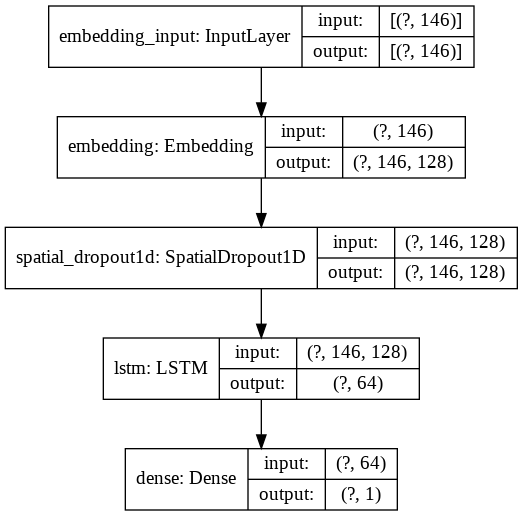

In [51]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [54]:
batch_size = 100
model.fit(train_X, train_y, epochs=5, batch_size=batch_size, 
          shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/5
315/315 [==============================] - 134s 427ms/step - loss: 0.3204 - accuracy: 0.8678 - val_loss: 0.2869 - val_accuracy: 0.8777
Epoch 2/5
315/315 [==============================] - 132s 419ms/step - loss: 0.1854 - accuracy: 0.9319 - val_loss: 0.3238 - val_accuracy: 0.8723
Epoch 3/5
315/315 [==============================] - 132s 420ms/step - loss: 0.1221 - accuracy: 0.9564 - val_loss: 0.4521 - val_accuracy: 0.8631
Epoch 4/5
315/315 [==============================] - 133s 421ms/step - loss: 0.0807 - accuracy: 0.9721 - val_loss: 0.4570 - val_accuracy: 0.8637
Epoch 5/5
315/315 [==============================] - 131s 416ms/step - loss: 0.0642 - accuracy: 0.9772 - val_loss: 0.4067 - val_accuracy: 0.8703


In [55]:
from sklearn.metrics import classification_report
y_pred = model.predict_classes(test_X)
print(classification_report(test_y,y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7143
           1       0.87      0.87      0.87      7857

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



## CNN model with own embedding

In [60]:
#Make the necessary imports
import os
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from keras.models import Model, Sequential
from keras.initializers import Constant

In [73]:
EMBEDDING_DIM = 128 # dimension for dense embeddings for each token
vocab_size # max vocal in transet 53314 MAX_NUM_WORDS
max_len # max sequence length 146 MAX_SEQUENCE_LENGTH

146

In [76]:
print("Defining and training a CNN model, training embedding layer on the fly instead of using pre-trained embeddings")
cnnmodel2 = Sequential()
cnnmodel2.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len))
cnnmodel2.add(Conv1D(128, 5, activation='relu'))
cnnmodel2.add(MaxPooling1D(5))
cnnmodel2.add(Conv1D(128, 5, activation='relu'))
#cnnmodel2.add(MaxPooling1D(5))
#cnnmodel2.add(Conv1D(128, 5, activation='relu'))
cnnmodel2.add(GlobalMaxPooling1D())
cnnmodel2.add(Dense(128, activation='relu'))
cnnmodel2.add(Dense(1, activation='softmax'))

cnnmodel2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
print(cnnmodel2.summary())

Defining and training a CNN model, training embedding layer on the fly instead of using pre-trained embeddings
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 146, 128)          6824192   
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 142, 128)          82048     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 28, 128)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 24, 128)           82048     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________

In [77]:
print(train_X.shape,train_y.shape)

(35000, 146) (35000,)


In [79]:
batch_size = 100
cnnmodel2.fit(train_X, train_y, epochs=5, batch_size=batch_size,verbose=1,
              validation_split=0.1)

Epoch 1/5
315/315 [==============================] - 86s 272ms/step - loss: 7.4610 - acc: 0.5107 - val_loss: 8.4481 - val_acc: 0.4460
Epoch 2/5
315/315 [==============================] - 86s 273ms/step - loss: 7.4610 - acc: 0.5107 - val_loss: 8.4481 - val_acc: 0.4460
Epoch 3/5
315/315 [==============================] - 86s 274ms/step - loss: 7.4610 - acc: 0.5107 - val_loss: 8.4481 - val_acc: 0.4460
Epoch 4/5
315/315 [==============================] - 86s 273ms/step - loss: 7.4610 - acc: 0.5107 - val_loss: 8.4481 - val_acc: 0.4460
Epoch 5/5
315/315 [==============================] - 87s 276ms/step - loss: 7.4610 - acc: 0.5107 - val_loss: 8.4481 - val_acc: 0.4460


In [80]:
#Evaluate on test set:
y_pred = cnnmodel2.predict_classes(test_X)
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7143
           1       0.52      1.00      0.69      7857

    accuracy                           0.52     15000
   macro avg       0.26      0.50      0.34     15000
weighted avg       0.27      0.52      0.36     15000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
